In [1]:
from sklearn.naive_bayes import MultinomialNB # A form of Naive bayes model, best for 2 or more classes for target variable
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from Spam_Preprocessor import SpamData_Preprocessor
from joblib import load

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h1> Testing on new datasets </h1>

In this notebook we will be performing robust testing by testing our trained models on new datasets made by Chatgpt. The first dataset we will test on is similar to the first one, but with new messages and a stricter class imbalance ( i.e. 1000 messages ,95% ham, 5% spam ).  

The second dataset is more adversial in nature in that the messages are designed to mimic messages hackers would use in phishing campaigns to infiltrate a business'internal systems. The messages include methods such text obfuscation, neutral language injection, etc. This datset is also 1000 messages but with the class imbalance ration of the original dataset.



<h2>New SMS Dataset</h2>

In [2]:

Spam_df = SpamData_Preprocessor('New_SMS_Dataset.txt')

In [3]:
Spam_df.head()

,Result,num_chars,num_words,num_spec_chars,num_digits,num_Uppercase_Words,num_URLS,num_Emails,num_Sus_Words,aah,...,zebra,zed,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk
0,0,54,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,37,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,65,11,3,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,55,13,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,50,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = Spam_df['Result']
X = Spam_df.drop(['Result'], axis = 1)

In [23]:
# lets load up our models
Bayes = load('Bayes_Model.joblib')
LogReg = load('LogReg_Model.joblib')

<h3> Testing on Naive Bayes</h3>

In [24]:
Y_Pred = Bayes.predict(X)

In [25]:
precision_bayes = precision_score(Y, Y_Pred, average='binary', pos_label=1)
recall_bayes = recall_score(Y, Y_Pred, average='binary', pos_label=1)       
f1_bayes = f1_score(Y, Y_Pred, average='binary', pos_label=1)               

print("Precision:", precision_bayes)
print("Recall:", recall_bayes)
print("F1-score:", f1_bayes)

Precision: 0.4050632911392405
Recall: 0.64
F1-score: 0.49612403100775193


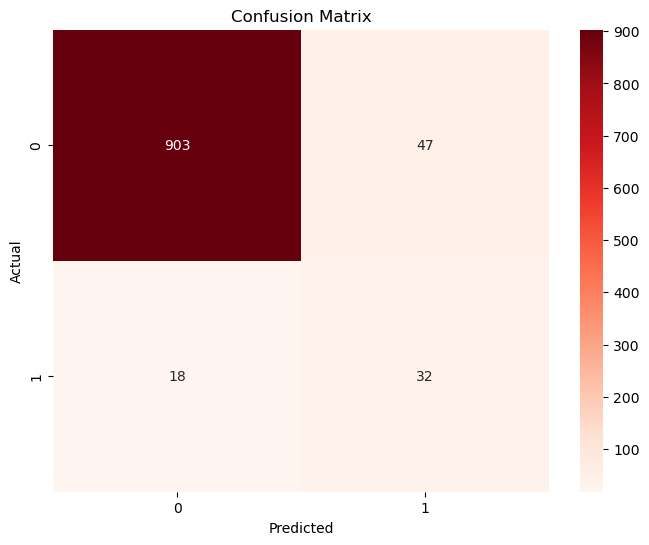

In [26]:
cm = confusion_matrix(Y, Y_Pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Based on the results, the metrics for my naive bayes model decreased signficantly. The decline in efficiency is more than likely due to the new vocabulary introduced with a new set of messages and the engineered features are not enough distinguish between spam and ham.   


<h3> Testing on Logistic Regression</h3>

In [27]:
Y_Pred_Log = LogReg.predict(X)

In [28]:
precision_Log = precision_score(Y, Y_Pred_Log, average='binary', pos_label=1)
recall_Log = recall_score(Y, Y_Pred_Log, average='binary', pos_label=1)       
f1_Log = f1_score(Y, Y_Pred_Log, average='binary', pos_label=1)               

print("Precision:", precision_Log)
print("Recall:", recall_Log)
print("F1-score:", f1_Log)

Precision: 1.0
Recall: 0.6
F1-score: 0.75


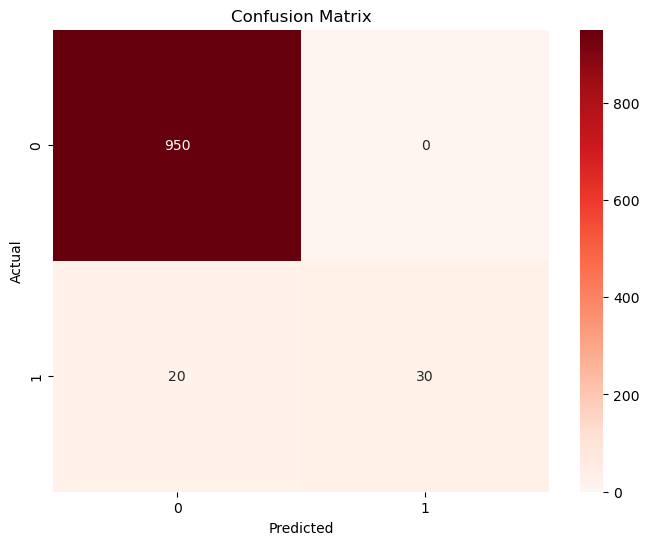

In [29]:
cm = confusion_matrix(Y, Y_Pred_Log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

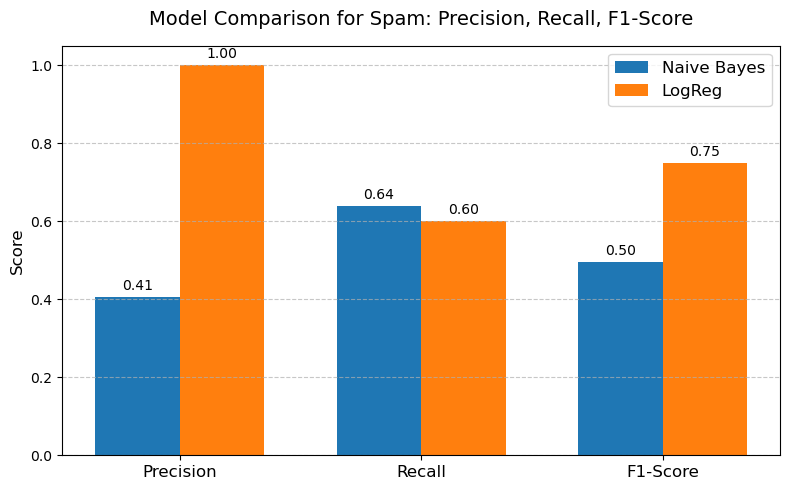

In [30]:
metrics = ['Precision', 'Recall', 'F1-Score']

Naive_Bayes_Scores = [precision_bayes,recall_bayes,f1_bayes]
LogReg_Scores = [precision_Log,recall_Log,f1_Log]

# Positions and width for bars
x = np.arange(len(metrics))  # [0, 1, 2]
width = 0.35  # Width of each bar

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bars_a = ax.bar(x - width/2, Naive_Bayes_Scores, width, label='Naive Bayes', color='#1f77b4')
bars_b = ax.bar(x + width/2, LogReg_Scores, width, label='LogReg', color='#ff7f0e')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Comparison for Spam: Precision, Recall, F1-Score', fontsize=14, pad=15)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars_a)
add_labels(bars_b)

plt.tight_layout()
plt.show()



Similarly to the previous test, logistic regression has performed better in comparison to naive bayes.  

This is more then likely happening for the following reasons: 

1. Logistic regression tries to **optimize** or find find the line of best separation
2. Naive Bayes assume **feature independence**, which could cause it lose out on important information
3. Naive Bayes **doesn't** try to optimize for anything, it simply works with the feature distribution that its given.  This further emphasizes that the vocabularly set will affect model performance.

<h2>Adversarial SMS Dataset</h2>

In [13]:
Adversary_SMS_df = SpamData_Preprocessor('Adversarial_SMS_Dataset.txt')

In [14]:
Adversary_SMS_df.head()

,Result,num_chars,num_words,num_spec_chars,num_digits,num_Uppercase_Words,num_URLS,num_Emails,num_Sus_Words,aah,...,zebra,zed,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk
0,1,90,13,9,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,79,15,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,59,12,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,67,13,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,102,20,5,2,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Y_Adv = Adversary_SMS_df['Result']
X_Adv = Adversary_SMS_df.drop(['Result'], axis = 1)

<h3> Testing on Naive Bayes, Threat Actor dataset</h3>

In [16]:
Y_Pred_Adv = Bayes.predict(X_Adv)

In [17]:
precision_bayes_Adv = precision_score(Y_Adv, Y_Pred_Adv, average='binary', pos_label=1)
recall_bayes_Adv = recall_score(Y_Adv, Y_Pred_Adv, average='binary', pos_label=1)       
f1_bayes_Adv = f1_score(Y_Adv, Y_Pred_Adv, average='binary', pos_label=1)               

print("Precision:", precision_bayes_Adv)
print("Recall:", recall_bayes_Adv)
print("F1-score:", f1_bayes_Adv)

Precision: 0.90625
Recall: 0.4461538461538462
F1-score: 0.5979381443298969


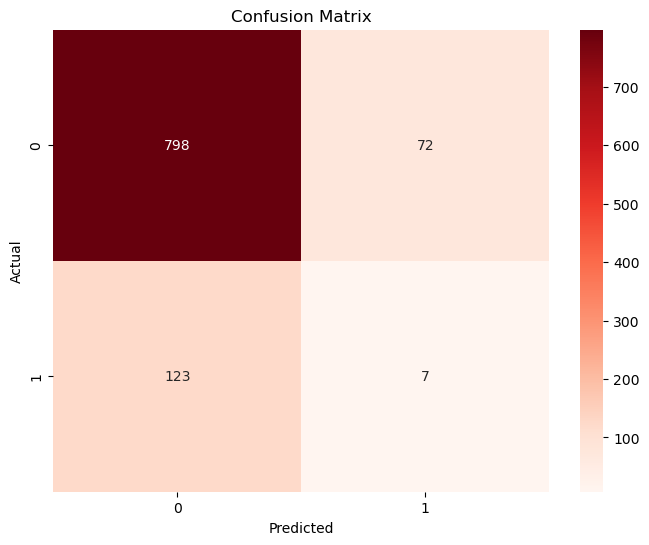

In [18]:
cm = confusion_matrix(Y_Adv, Y_Pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

So naive bayes , based on these results, is poor at detecting spam but phenomenal at identifying or labeling the spam it does detect.

<h3> Testing on Logsitic Regression, Threat Actor dataset</h3>

In [19]:
Y_Pred_Log_Adv = LogReg.predict(X_Adv)

In [20]:
precision_Log_Adv = precision_score(Y_Adv, Y_Pred_Log_Adv, average='binary', pos_label=1)
recall_Log_Adv = recall_score(Y_Adv, Y_Pred_Log_Adv, average='binary', pos_label=1)       
f1_Log_Adv = f1_score(Y_Adv, Y_Pred_Log_Adv, average='binary', pos_label=1)               

print("Precision:", precision_Log_Adv)
print("Recall:", recall_Log_Adv)
print("F1-score:", f1_Log_Adv)

Precision: 0.8235294117647058
Recall: 0.1076923076923077
F1-score: 0.19047619047619047


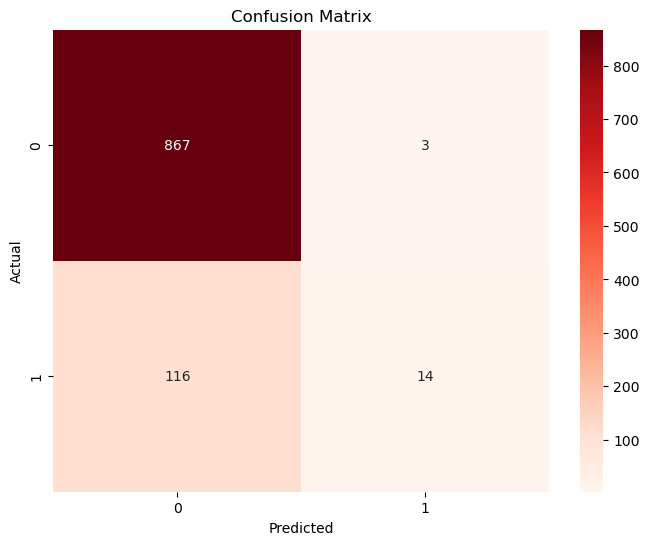

In [21]:
cm = confusion_matrix(Y_Adv, Y_Pred_Log_Adv)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

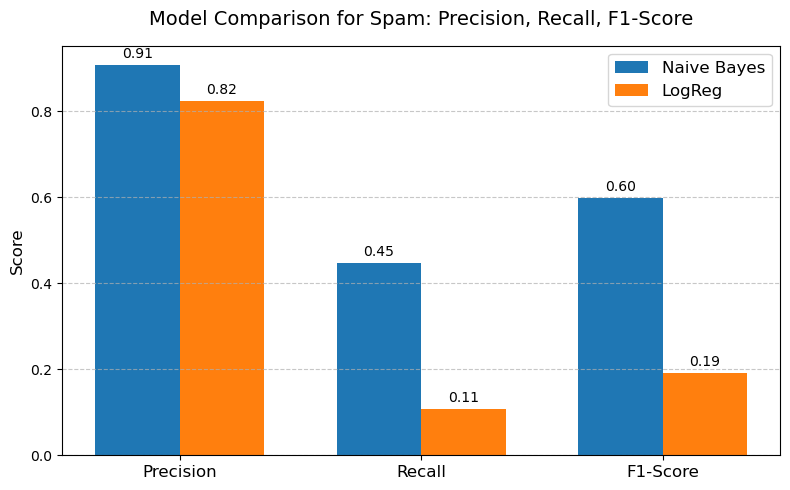

In [22]:
metrics = ['Precision', 'Recall', 'F1-Score']

Naive_Bayes_Scores = [precision_bayes_Adv,recall_bayes_Adv,f1_bayes_Adv]
LogReg_Scores = [precision_Log_Adv,recall_Log_Adv,f1_Log_Adv]

# Positions and width for bars
x = np.arange(len(metrics))  # [0, 1, 2]
width = 0.35  # Width of each bar

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bars_a = ax.bar(x - width/2, Naive_Bayes_Scores, width, label='Naive Bayes', color='#1f77b4')
bars_b = ax.bar(x + width/2, LogReg_Scores, width, label='LogReg', color='#ff7f0e')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Comparison for Spam: Precision, Recall, F1-Score', fontsize=14, pad=15)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars_a)
add_labels(bars_b)

plt.tight_layout()
plt.show()



Both models have good preciosion but low recall scores , and as a result low F1 scores. This is more than likely due to the following:

1.  The adversarial emails introduced new spam features that are not accounted for with my current models
2.  There is a new vocabulary set that is throwing off the models


<h1> Conclusion</h1>

On the new sms dataset, the naive bayes model had signficant performance decrease. The logistic model also suffered performance decrease but is still relatively good with a F1 socre of 0.75. However, on the adversarial sms dataset, both models demonstrated poor performance.

The decline in efficiency is more than likely due to the engineered features I constructed not being able to **Generalize** to new datasets. In other words, my features helped my models perform well because they were features **Specific** to that dataset.  

Since the features I made are based on **averages**, it makes sense that performnce would drop on new data because **feature frequencies** will differ and therefore averages.  

The following may be better methods in feature construction for better generalization:

1. TF-IDF helps assert importance or weight to words better than CountVectorizer.
2. N-gram ( other unigram) analysis helps derive context and with Collocations, derive statistical signficance to the n-grams
3. Type-Token Ratio to examine repetitve words
4. Examine Readability metrics, since spam can sometimes be incomprehensible.